In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Params
lr = 0.001
batch_size = 100
SAMPLING_NUM = 1000000
COST_THRESHOLD = 6.1e-09

In [2]:
# INIT
params = np.zeros(shape = (3,1))
params[0][0] = 3
params[1][0] = 1
params[2][0] = 2
x_data = np.ones(shape=(SAMPLING_NUM,3)) # 1, x1, x2
y_data = np.zeros(shape = (SAMPLING_NUM, 1)) # y
noise = np.zeros(shape = (SAMPLING_NUM, 1))
noise[:,0] = np.random.normal(0, 1.414, SAMPLING_NUM)
x_data[:,1] = np.random.normal(3, 2, SAMPLING_NUM)
x_data[:,2] = np.random.normal(-1, 2, SAMPLING_NUM)

y_data = np.dot(x_data, params)
y_data = np.add(y_data, noise)

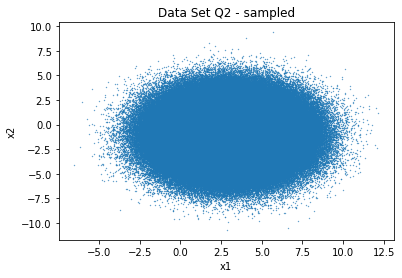

In [3]:
plt.title("Data Set Q2 - sampled") 
plt.xlabel("x1") 
plt.ylabel("x2") 
plt.scatter(x_data[:,1], x_data[:,2], s=0.1)
plt.show()
# print(int(y_data.shape[0]))

In [4]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
def update_line(hl, new_data):
    xdata, ydata, zdata = hl._verts3d
    hl.set_xdata(list(np.append(xdata, new_data[0])))
    hl.set_ydata(list(np.append(ydata, new_data[1])))
    hl.set_3d_properties(list(np.append(zdata, new_data[2])))
    plt.draw()

In [5]:
def f(x, y):
    return x+4*y

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)


X, Y = np.meshgrid(x, y)
Z = f(X, Y)

(0.0, 5.0)

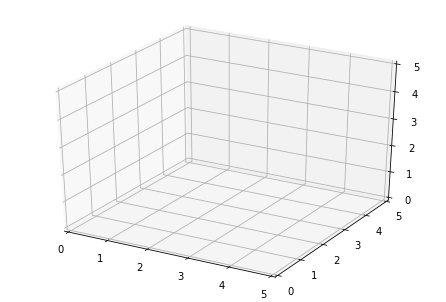

In [6]:
map = plt.figure()
map_ax = Axes3D(map)
map_ax.autoscale(enable=True, axis='both', tight=True)

# # # Setting the axes properties
map_ax.set_xlim3d([0.0, 5.0])
map_ax.set_ylim3d([0.0, 5.0])
map_ax.set_zlim3d([0.0, 5.0])
# hl, = map_ax.plot3D([learned_params[1]], [learned_params[2]], [cost(x_data, y_data, learned_params, 0, )])

In [15]:
def cost(x_data, y_data, params, ll, ul):
    sum = 0
    for i in range(ll, ul):
        sum = sum + ((1/(ul-ll+1))*(y_data[i]-np.dot(params, x_data[i]))**2)/2
    return sum

In [23]:
from os import system
from IPython.display import clear_output
def sgd_main(x_data, y_data):
    m = int(y_data.shape[0])
    r = batch_size
    theta = np.zeros(shape = (1, 3))
    epoch = 0
    ll = 0
    ul = r
    prevcost=0
    while(True):
        p = 0
        ll=0
        ul=r
        
        map = plt.figure()
        map_ax = Axes3D(map)
        map_ax.autoscale(enable=True, axis='both', tight=True)
        # # # Setting the axes properties
        map_ax.set_xlim3d([0.0, 5.0])
        map_ax.set_ylim3d([0.0, 5.0])
        map_ax.set_zlim3d([0.0, 5.0])
        hl, = map_ax.plot3D([theta[0][0]], [theta[0][1]], [theta[0][2]])
        
        while(p <= m):    
            # p-th batch
            
            update_line(hl, (theta[0][0], theta[0][1], theta[0][2]))
            plt.show(block=False)
            plt.pause(0.2)
            
            prevcost = cost(x_data, y_data, theta, ll, ul)
#             clear_output(wait=True)
#             print('=================EPOCH %s=================' % epoch)
            for i in range(p, r+p):
                gradient = np.zeros(3)
                for j in range(3):
                    gradient[j] += ((y_data[i] - np.dot(theta, x_data[i])) * x_data[i][j])/r
                    theta[0][j] += lr * gradient[j]
#             print('Batch %s out of %s batches\n' % (p/r, m/r))
            print(theta[0])
            p += r
            if(p == m):
                break
#             print('COST DiFF: %s \n' % (prevcost-cost(x_data, y_data, theta, ll, ul)))
            if(prevcost - cost(x_data, y_data, theta, ll, ul)<COST_THRESHOLD):
                return theta
            prevcost = cost(x_data, y_data, theta, ll, ul)
            ll += r
            ul += r
        epoch+=1
        break
    return theta

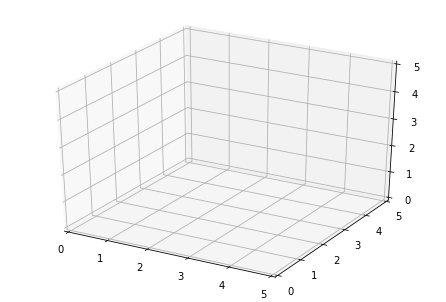

[0.00371122 0.0148122  0.004803  ]


<Figure size 432x288 with 0 Axes>

[0.00812874 0.03162813 0.00765721]


<Figure size 432x288 with 0 Axes>

[0.01237955 0.05126363 0.0104439 ]


<Figure size 432x288 with 0 Axes>

[0.01524423 0.06358516 0.01425197]


<Figure size 432x288 with 0 Axes>

[0.01891899 0.07979518 0.01764897]


<Figure size 432x288 with 0 Axes>

[0.02284984 0.09734466 0.0209936 ]


<Figure size 432x288 with 0 Axes>

[0.02643751 0.11050681 0.02463514]


<Figure size 432x288 with 0 Axes>

[0.02993544 0.12476227 0.02835383]


<Figure size 432x288 with 0 Axes>

[0.03291476 0.13539888 0.03425829]


<Figure size 432x288 with 0 Axes>

[0.0372089  0.15346362 0.03886624]


<Figure size 432x288 with 0 Axes>

[0.0413882  0.169686   0.04402338]


<Figure size 432x288 with 0 Axes>

[0.0457639  0.18721565 0.04682025]


<Figure size 432x288 with 0 Axes>

[0.04920589 0.19968918 0.05118526]


<Figure size 432x288 with 0 Axes>

[0.05278364 0.2151335  0.05510166]


<Figure size 432x288 with 0 Axes>

[0.05622931 0.2286774  0.05824413]


<Figure size 432x288 with 0 Axes>

[0.05988307 0.24113351 0.06368628]


<Figure size 432x288 with 0 Axes>

[0.06312341 0.25223708 0.06946354]


<Figure size 432x288 with 0 Axes>

[0.06694982 0.26683401 0.07504555]


<Figure size 432x288 with 0 Axes>

[0.06978563 0.27709966 0.07946787]


<Figure size 432x288 with 0 Axes>

[0.07332946 0.28895201 0.08485785]


<Figure size 432x288 with 0 Axes>

[0.07595836 0.29984033 0.08991992]


<Figure size 432x288 with 0 Axes>

[0.07871533 0.31064442 0.09316201]


<Figure size 432x288 with 0 Axes>

[0.08215397 0.32328712 0.09856606]


<Figure size 432x288 with 0 Axes>

[0.08539483 0.33697737 0.10405576]


<Figure size 432x288 with 0 Axes>

[0.08873656 0.35128823 0.10783112]


<Figure size 432x288 with 0 Axes>

[0.09167617 0.36276589 0.11300935]


<Figure size 432x288 with 0 Axes>

[0.09470274 0.37641983 0.11808477]


<Figure size 432x288 with 0 Axes>

[0.09819327 0.39050922 0.12355486]


<Figure size 432x288 with 0 Axes>

[0.10126526 0.40270322 0.12700784]


<Figure size 432x288 with 0 Axes>

[0.10439792 0.41440824 0.13300709]


<Figure size 432x288 with 0 Axes>

[0.10704727 0.42535894 0.13883211]


<Figure size 432x288 with 0 Axes>

[0.10988865 0.43755999 0.1450445 ]


<Figure size 432x288 with 0 Axes>

[0.11292472 0.44960867 0.15031901]


<Figure size 432x288 with 0 Axes>

[0.11581605 0.46008747 0.15611152]


<Figure size 432x288 with 0 Axes>

[0.1181713  0.46662457 0.16225173]


<Figure size 432x288 with 0 Axes>

[0.12131105 0.47747911 0.16619826]


<Figure size 432x288 with 0 Axes>

[0.12285324 0.4841501  0.17185166]


<Figure size 432x288 with 0 Axes>

[0.12545771 0.49367817 0.17777775]


<Figure size 432x288 with 0 Axes>

[0.12827976 0.50339796 0.1827695 ]


<Figure size 432x288 with 0 Axes>

[0.13120729 0.51425038 0.188425  ]


<Figure size 432x288 with 0 Axes>

[0.13387889 0.52562848 0.19363468]


<Figure size 432x288 with 0 Axes>

[0.13696054 0.53566455 0.19868202]


<Figure size 432x288 with 0 Axes>

[0.13912459 0.54373654 0.20246851]


<Figure size 432x288 with 0 Axes>

[0.14107646 0.55193748 0.20671313]


<Figure size 432x288 with 0 Axes>

[0.14334838 0.56056007 0.21238436]


<Figure size 432x288 with 0 Axes>

[0.14581616 0.56967554 0.21779116]


<Figure size 432x288 with 0 Axes>

[0.14849792 0.58017327 0.22291219]


<Figure size 432x288 with 0 Axes>

[0.15135937 0.59117203 0.2275087 ]


<Figure size 432x288 with 0 Axes>

[0.15361948 0.59864906 0.23239153]


<Figure size 432x288 with 0 Axes>

[0.155673   0.60664623 0.2373571 ]


<Figure size 432x288 with 0 Axes>

[0.15760641 0.61396181 0.2423101 ]


<Figure size 432x288 with 0 Axes>

[0.15995054 0.62100128 0.24762102]


<Figure size 432x288 with 0 Axes>

[0.16237863 0.62949763 0.25493125]


<Figure size 432x288 with 0 Axes>

[0.16512748 0.63906064 0.26214421]


<Figure size 432x288 with 0 Axes>

[0.16675942 0.6461877  0.26819314]


<Figure size 432x288 with 0 Axes>

[0.16968766 0.65732842 0.27300571]


<Figure size 432x288 with 0 Axes>

[0.17194969 0.66548642 0.27709522]


<Figure size 432x288 with 0 Axes>

[0.17413266 0.67383439 0.28220946]


<Figure size 432x288 with 0 Axes>

[0.17647184 0.68311877 0.28828626]


<Figure size 432x288 with 0 Axes>

[0.17836002 0.68990607 0.2909097 ]


<Figure size 432x288 with 0 Axes>

[0.1801403  0.69638832 0.29395964]


<Figure size 432x288 with 0 Axes>

[0.18185657 0.70344235 0.29936154]


<Figure size 432x288 with 0 Axes>

[0.18460548 0.71428837 0.30319232]


<Figure size 432x288 with 0 Axes>

[0.18629178 0.71990622 0.3083558 ]


<Figure size 432x288 with 0 Axes>

[0.18765729 0.72565211 0.31303756]


<Figure size 432x288 with 0 Axes>

[0.18897057 0.73074684 0.31678735]


<Figure size 432x288 with 0 Axes>

[0.19054778 0.7360054  0.32248242]


<Figure size 432x288 with 0 Axes>

[0.19188229 0.74079952 0.32745025]


<Figure size 432x288 with 0 Axes>

[0.19445572 0.75031882 0.3319022 ]


<Figure size 432x288 with 0 Axes>

[0.19684826 0.75998161 0.33580562]


<Figure size 432x288 with 0 Axes>

[0.1988375  0.76717137 0.34157583]


<Figure size 432x288 with 0 Axes>

[0.20052021 0.77419713 0.34690675]


<Figure size 432x288 with 0 Axes>

[0.20202642 0.77958797 0.35155843]


<Figure size 432x288 with 0 Axes>

[0.20329533 0.78380123 0.35561922]


<Figure size 432x288 with 0 Axes>

[0.20495979 0.78999911 0.36156097]


<Figure size 432x288 with 0 Axes>

[0.206528   0.79519754 0.36715754]


<Figure size 432x288 with 0 Axes>

[0.20828813 0.80103529 0.37322854]


<Figure size 432x288 with 0 Axes>

[0.21008096 0.80836081 0.38011921]


<Figure size 432x288 with 0 Axes>

[0.21182617 0.8144556  0.38638709]


<Figure size 432x288 with 0 Axes>

[0.21312865 0.8199787  0.39258407]


<Figure size 432x288 with 0 Axes>

[0.21483737 0.8256664  0.39865505]


<Figure size 432x288 with 0 Axes>

[0.21630162 0.8306066  0.40250247]


<Figure size 432x288 with 0 Axes>

[0.21774737 0.83431028 0.4068258 ]


<Figure size 432x288 with 0 Axes>

[0.21963473 0.84008704 0.4122503 ]


<Figure size 432x288 with 0 Axes>

[0.22104597 0.84421218 0.41819436]


<Figure size 432x288 with 0 Axes>

[0.22241206 0.84740585 0.42355484]


<Figure size 432x288 with 0 Axes>

[0.22421121 0.85362087 0.42816775]


<Figure size 432x288 with 0 Axes>

[0.22514535 0.85720717 0.43330359]


<Figure size 432x288 with 0 Axes>

[0.22655161 0.86051343 0.43813302]


<Figure size 432x288 with 0 Axes>

[0.22819609 0.86624551 0.44363042]


<Figure size 432x288 with 0 Axes>

[0.22971028 0.86953841 0.44744995]


<Figure size 432x288 with 0 Axes>

[0.2310338  0.87430378 0.45229047]


<Figure size 432x288 with 0 Axes>

[0.23264017 0.87970971 0.45586864]


<Figure size 432x288 with 0 Axes>

[0.23425346 0.88404242 0.46017943]


<Figure size 432x288 with 0 Axes>

[0.23619903 0.89131418 0.46342   ]


<Figure size 432x288 with 0 Axes>

[0.23715724 0.89343334 0.46907142]


<Figure size 432x288 with 0 Axes>

[0.23799339 0.89654799 0.47640042]


<Figure size 432x288 with 0 Axes>

[0.23955978 0.90098343 0.48178002]


<Figure size 432x288 with 0 Axes>

[0.24095861 0.90621393 0.48504694]


<Figure size 432x288 with 0 Axes>

[0.24279541 0.91149521 0.48957018]


<Figure size 432x288 with 0 Axes>

[0.24451259 0.91742025 0.49561719]


<Figure size 432x288 with 0 Axes>

[0.24537367 0.92055534 0.50001664]


<Figure size 432x288 with 0 Axes>

[0.24741029 0.92760512 0.50393297]


<Figure size 432x288 with 0 Axes>

[0.24860782 0.93090841 0.50762719]


<Figure size 432x288 with 0 Axes>

[0.24964215 0.93312424 0.51121304]


<Figure size 432x288 with 0 Axes>

[0.25072159 0.93592412 0.51557461]


<Figure size 432x288 with 0 Axes>

[0.25224294 0.93930886 0.52150274]


<Figure size 432x288 with 0 Axes>

[0.25371429 0.94469398 0.52649582]


<Figure size 432x288 with 0 Axes>

[0.25503255 0.9484069  0.53064549]


<Figure size 432x288 with 0 Axes>

[0.25651327 0.95327582 0.53369121]


<Figure size 432x288 with 0 Axes>

[0.25784831 0.9573754  0.53648614]


<Figure size 432x288 with 0 Axes>

[0.25914954 0.96068296 0.54227631]


<Figure size 432x288 with 0 Axes>

[0.26099798 0.96612807 0.54717065]


<Figure size 432x288 with 0 Axes>

[0.26208797 0.97026036 0.55244788]


<Figure size 432x288 with 0 Axes>

[0.26355819 0.97364373 0.55665861]


<Figure size 432x288 with 0 Axes>

[0.26484742 0.97794006 0.56040185]


<Figure size 432x288 with 0 Axes>

[0.26603186 0.98269324 0.56437168]


<Figure size 432x288 with 0 Axes>

[0.26748168 0.98744866 0.56803215]


<Figure size 432x288 with 0 Axes>

[0.26828159 0.98928046 0.57223739]


<Figure size 432x288 with 0 Axes>

[0.26991128 0.99524668 0.57797115]


<Figure size 432x288 with 0 Axes>

[0.27157842 0.9994289  0.58183039]


<Figure size 432x288 with 0 Axes>

[0.27304977 1.00489921 0.58816662]


<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [24]:
learned_params = sgd_main(x_data, y_data)

In [7]:
# Unit Test
# learned_params = np.zeros(shape = (4, 3))
# for i in range(4):
#     batch_size = (100**i)
#     learned_params[i] = sgd_main(x_data, y_data)
#     print('Learned Params with batch_size = %s : theta = %s \n' % (batch_size,str(learned_params[i])))
#     print('COST: %s \n' % cost(x_data, y_data, learned_params[i], 0, int(y_data.shape[0])))
#     break

# Report

In [8]:
TESTING_SIZE = 10000
testing_x = np.ones(shape = (TESTING_SIZE, 3))
testing_y = np.ones(shape = (TESTING_SIZE, 1))
print(testing_x[:,0])
print(testing_y[:,0])

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


In [9]:
f = open('./q2/q2test.csv','r')
cnt = 0
for x in f:
    lt = x.split(',')
    testing_x[cnt][0] = 1
    testing_x[cnt][1] = lt[0]
    testing_x[cnt][2] = lt[1]
    testing_y[cnt][0] = lt[2]
    cnt += 1

In [10]:
print(testing_y.shape)
print(testing_x.shape)

(10000, 1)
(10000, 3)


In [11]:
print(cost(testing_x, testing_y, learned_params,0, TESTING_SIZE))

[1.07833971]
